In [1]:
from itertools import combinations
import numpy as np
import sys
from oxDNA_analysis_tools.UTILS.oxview import oxdna_conf, from_path
from oxDNA_analysis_tools.UTILS.RyeReader import describe, get_confs, inbox
from oxDNA_analysis_tools.UTILS.data_structures import TopInfo, TrajInfo
from pathlib import Path
import os
from ipy_oxdna.dna_structure import DNAStructure, DNAStructureStrand, load_dna_structure, DNABase, strand_from_info
from copy import deepcopy
from ipy_oxdna.oxdna_simulation import Simulation, SimulationManager
import copy
from tqdm.auto import tqdm

from ipy_oxdna.oxdna_simulation import Simulation, SimulationManager
import os
import random

In [2]:
base_path = '/home/ava/MetaBackbone_project/Metabackbone-scripts/structure_files/six_helix_oxdna_file/unmodified/1512_bp'

def load_dna_structure_files(base_path):
    
    dat_path = os.path.join(base_path, '1512_bp.dat')
    top_path = os.path.join(base_path, '1512_bp.top')
    dna = load_dna_structure(top_path, dat_path)
    return dna

In [3]:
dna = load_dna_structure_files(base_path)

In [4]:
def find_longest_strand(dna):
    
    longest_strand = None
    longest_strand_index = -1
    max_length = 0
    
    for index, strand in enumerate(dna.strands):
        if len(strand.bases) > max_length:
            max_length = len(strand.bases)
            longest_strand = strand
            longest_strand_index = index
    
    return longest_strand, longest_strand_index

In [5]:
longest_strand, longest_strand_index = list(find_longest_strand(dna))      # Has been checked with the oxview information and they match
print ("longest_strand:",longest_strand)
print("longest_strand_index:",longest_strand_index)
print("Number of bases in longest strand:",len(longest_strand))

longest_strand: <ipy_oxdna.dna_structure.DNAStructureStrand object at 0x75d086bc7890>
longest_strand_index: 2
Number of bases in longest strand: 1512


In [6]:
def find_cross_over_in_longest_strand(longest_strand):
    
    min_distance = float('inf')
    max_index_difference = 0
    cross_over_bases_max = (None, None)
    num_bases = len(longest_strand)

    for i in range(num_bases):
        
        for j in range(i + 1, num_bases):
            
            base_i = longest_strand[i]
            base_j = longest_strand[j]
            index_difference = abs(base_i.uid - base_j.uid)
            distance = np.linalg.norm(np.array(base_i.pos) - np.array(base_j.pos))

            if index_difference > max_index_difference or (index_difference == max_index_difference and distance < min_distance):
                max_index_difference = index_difference
                min_distance = distance
                cross_over_bases_max = (base_i, base_j)

    return cross_over_bases_max, max_index_difference, min_distance

In [7]:
cross_over_bases_max, max_index_difference, min_distance = find_cross_over_in_longest_strand(longest_strand)          # Has been checked with the oxview info and they match
print("cross_over_bases_max:",cross_over_bases_max)
print("max_index_difference:", max_index_difference)
print("min_distance:", min_distance)

cross_over_bases_max: (DNABase(uid=43, base='T', pos=array([ 2.10507846, -0.6867429 ,  0.12683482]), a1=array([ 0.17443815, -0.98466813,  0.        ]), a3=array([0., 0., 1.])), DNABase(uid=1554, base='T', pos=array([2.37799716, 0.69653118, 0.12683482]), a1=array([-0.28042587,  0.95987568,  0.        ]), a3=array([ 0.,  0., -1.])))
max_index_difference: 1511
min_distance: 1.4099403509855792


In [8]:
left_indices = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405,1406,1407,1408,1409,1410,1411,1412,1413,1414,1415,1416,1417,1418,1419,1420,1421,1422,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440,1441,1442,1443,1444,1445,1446,1447,1448,1449,1450,1451,1452,1453,1454,2293,2294,2295,2301,2302,2303,2304,2305,2306,2307,2308,2309,2310,2311,2312,2313,2314,2315,2316,2317,2318,2319,2320,2321,2322,2323,2324,2325,2326,2327,2328,2329,2330,2331,2332,2333,2334,2335,2336,2337,2338,2339,2340,2341,2342,2343,2344,2345,2346,2347,2348,2349,2350,2351,2352,2353,2354,2355,2356,2357,2358,2359,2360,2361,2362,2363,2364,2365,2366,2367,2368,2369,2370,2371,2372,2373,2374,2375,2376,2377,2378,2379,2380,2381,2783,2784,2785,2786,2787,2788,2789,2802,2803,2804,2805,2806,3011,3012,3013,3014,3015,3016,3017,3018,3019,3020,3021,3022,3023,3024,3025,3026,3027,3028,3029,3030,3031,3032,3033,3034,3035,3036,3037,3038,3039,3040,3041,3042,3043,3044,3045,3046,3047,3048,3049,3050,3051,3052,3053,3054,3055,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065,3066,3067]
right_indices = [20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,1160,1161,1162,1163,1164,1165,1166,1167,1168,1169,1170,1171,1172,1173,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199,1555,1556,1557,1558,1559,1560,1561,1562,1563,1564,1565,1566,1567,1568,1569,1570,1571,1572,1573,1574,1575,1576,1577,1578,1579,1580,1581,1582,1583,1584,1585,1586,1587,1588,1589,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,1610,1611,1612,1613,1614,1615,1616,1617,1618,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1630,1631,1632,1633,1634,1635,1636,1637,1638,1639,1640,1641,1642,1643,1644,1645,1646,1647,1648,1649,1650,1651,1652,1653,1654,1655,1656,1657,1658,1667,1668,1669,1670,2382,2383,2384,2385,2386,2387,2388,2389,2390,2391,2392,2393,2394,2395,2396,2397,2398,2399,2400,2401,2402,2403,2404,2405,2406,2407,2408,2409,2410,2411,2412,2413,2414,2415,2416,2417,2418,2419,2420,2421,2422,2423,2424,2425,2426,2427,2428,2429,2430,2431,2432,2433,2434,2435,2436,2437,2438,2439,2440,2441,2442,2443,2444,2445,2446,2447,2448,2449,2450,2451,2452,2453,2454,2455,2456,2457,2458,2459,2460,2461,2462,2463,2464,2465,2466,2467,2479,2480,2481,2482,2483,2484,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500,2501,2502,2818,2819,2820,2821,2822,2823]

def calculate_left_right_pos(dna, left_indices, right_indices):
    
    left_pos = []
    right_pos = []

    for strand in dna.strands:
        for base in strand:
            if base.uid in left_indices:
                left_pos.append(base.pos)

    for strand in dna.strands:
        for base in strand:
            if base.uid in right_indices:
                right_pos.append(base.pos)

    all_uids = [base.uid for strand in dna.strands for base in strand]
    
    # print(f"All base UIDs in DNA: {all_uids}")
    # print(f"Left indices: {left_indices}")
    # print(f"Right indices: {right_indices}")
    # print(f"Left positions found: {left_pos}")
    # print(f"Right positions found: {right_pos}")

    if left_pos:
        cms_left_side = np.mean(left_pos, axis=0)
    else:
        raise ValueError("No positions found for left indices.")

    if right_pos:
        cms_right_side = np.mean(right_pos, axis=0)
    else:
        raise ValueError("No positions found for right indices.")

    return cms_left_side, cms_right_side

In [9]:
def is_point_far_from_crossovers(point, crossover_positions, min_distance_threshold):
    for pos in crossover_positions:
        distance = np.linalg.norm(np.array(point) - np.array(pos))
        if distance < min_distance_threshold:
            return False
    return True

In [10]:
def find_valid_point(dna, left_indices, right_indices, longest_strand, min_distance_threshold= 3 ):
    
    cms_left_side, cms_right_side = calculate_left_right_pos(dna, left_indices, right_indices)
    cross_over_bases, max_index_difference, min_distance = find_cross_over_in_longest_strand(longest_strand)
    crossover_positions = [base.pos for base in cross_over_bases if base is not None]

    t = random.uniform(0, 1)
    first_P = np.array(cms_left_side + t * (cms_right_side - cms_left_side))

    if not crossover_positions:
        return first_P

    while True:
        t = random.uniform(0, 1)
        P = np.array(cms_left_side + t * (cms_right_side - cms_left_side))

        if is_point_far_from_crossovers(P, crossover_positions, min_distance_threshold):
            return P

In [11]:
# Find some point on both left and right sides of the point P to calculate the bent angle 
def find_bases_around_point(dna, point, min_distance, max_distance):
    
    left_bases = []
    right_bases = []

    for strand in dna.strands:
        for base in strand:
            distance = np.linalg.norm(np.array(base.pos) - np.array(point))
            if min_distance < distance < max_distance:
                if base.pos[0] < point[0]:
                    left_bases.append(base.pos)
                else:
                    right_bases.append(base.pos)

    return left_bases, right_bases

In [12]:
def calculate_center_of_mass(positions):
    if not positions:
        raise ValueError("No positions provided for center of mass calculation.")
    return np.mean(positions, axis=0)

In [13]:
def calculate_bend_angle(P, cms_left, cms_right):
    
    vec_left = cms_left - P
    vec_right = cms_right - P

    unit_vec_left = vec_left / np.linalg.norm(vec_left)
    unit_vec_right = vec_right / np.linalg.norm(vec_right)

    dot_product = np.dot(unit_vec_left, unit_vec_right)
    angle = np.arccos(dot_product) * (180.0 / np.pi)

    return angle

In [14]:
P = find_valid_point(dna, left_indices, right_indices, longest_strand)
print(f"Valid point P: {P}")
print()
cross_over_bases, max_index_difference, min_distance = find_cross_over_in_longest_strand(longest_strand)
print(f"Cross over bases: {cross_over_bases}")
print(f"Max index difference: {max_index_difference}")
print(f"Min distance: {min_distance}")

Valid point P: [  0.04876747  -0.16804613 -36.9560128 ]

Cross over bases: (DNABase(uid=43, base='T', pos=array([ 2.10507846, -0.6867429 ,  0.12683482]), a1=array([ 0.17443815, -0.98466813,  0.        ]), a3=array([0., 0., 1.])), DNABase(uid=1554, base='T', pos=array([2.37799716, 0.69653118, 0.12683482]), a1=array([-0.28042587,  0.95987568,  0.        ]), a3=array([ 0.,  0., -1.])))
Max index difference: 1511
Min distance: 1.4099403509855792


In [15]:
def find_bend_angle(dna, left_indices, right_indices, longest_strand, min_distance_threshold=2.0, min_distance=5.0, max_distance=10.0):
    
    point_pos = find_valid_point(dna, left_indices, right_indices, longest_strand, min_distance_threshold)
    left_bases, right_bases = find_bases_around_point(dna, point_pos, min_distance, max_distance)

    cms_left = calculate_center_of_mass(left_bases)
    cms_right = calculate_center_of_mass(right_bases)

    bend_angle = calculate_bend_angle(point_pos, cms_left, cms_right)

    return point_pos, bend_angle

In [16]:
P_pos, bend_angle = find_bend_angle(dna, left_indices, right_indices, longest_strand, min_distance_threshold=5.0, min_distance=5.0, max_distance=10.0)
print(f"Point P position: {P_pos}")
print(f"Bend angle at point P: {bend_angle} degrees")

Point P position: [ 5.48821817e-02  4.24284269e-03 -9.29366661e+00]
Bend angle at point P: 179.26311862714192 degrees


In [17]:
def calculate_angles_for_all_structures(dna_list, left_indices, right_indices, min_distance_threshold=2.0, min_distance=5.0, max_distance=10.0):
    angles = []
    for dna in dna_list:
        longest_strand, _ = find_longest_strand(dna)
        point_pos, bend_angle = find_bend_angle(dna, left_indices, right_indices, longest_strand, min_distance_threshold, min_distance, max_distance)
        angles.append((point_pos, bend_angle))
    return angles

In [18]:
sphere_radius = 3.5   # I checked the radius of the bundle from the oxview and chose this number for the sphere radius

def find_bases_in_sphere(dna, point, sphere_radius):
    bases_in_sphere = []
    base_to_strand_mapping = {}
    
    for strand_index, strand in enumerate(dna.strands):
        for base in strand:
            base_position = np.array(base.pos)
            distance = np.linalg.norm(base_position - point)
            # print(f"Base UID: {base.uid}, Position: {base_position}, Distance to P: {distance}")

            if distance < sphere_radius:
                bases_in_sphere.append(base.uid)
                base_to_strand_mapping[base.uid] = strand_index
                # print(f"Base UID {base.uid} is within the sphere radius")
    
    return bases_in_sphere, base_to_strand_mapping

In [19]:
bases_in_sphere, base_to_strand_mapping = find_bases_in_sphere(dna, P, sphere_radius)
print('bases_in_sphere:', bases_in_sphere)
print('base_to_strand_mapping:', base_to_strand_mapping)
print('Number_bases_in_sphere:', len(bases_in_sphere))

bases_in_sphere: [41, 42, 631, 632, 633, 634, 635, 636, 637, 638, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1621, 1622, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1669, 1670, 2419, 2420, 2478, 2479, 2480, 2481, 2482, 2483, 2484, 2490, 2491, 2492, 2493, 2494, 2495, 2496, 2497, 2498, 2499, 2500, 2501, 2502, 2818, 2819, 2820, 2821]
base_to_strand_mapping: {41: 1, 42: 1, 631: 2, 632: 2, 633: 2, 634: 2, 635: 2, 636: 2, 637: 2, 638: 2, 693: 2, 694: 2, 695: 2, 696: 2, 697: 2, 698: 2, 699: 2, 700: 2, 701: 2, 702: 2, 873: 2, 874: 2, 875:

In [20]:
def export_dna_structures(new_dna_structures, base_path):
    
    output_paths = []
    
    for i, new_dna in enumerate(new_dna_structures):
        
        structure_id = i  
        unique_subdir = os.path.join(base_path, f'structure_{structure_id}')
        os.makedirs(unique_subdir, exist_ok=True)
        dat_path = os.path.join(unique_subdir, '1512_bp_rmv_staples.dat')
        top_path = os.path.join(unique_subdir, '1512_bp_rmv_staples.top')
        
        new_dna.export_top_conf(Path(top_path), Path(dat_path))
        
        output_paths.append({
            'structure_id': structure_id,
            'dat_path': dat_path,
            'top_path': top_path
        })

    return output_paths

In [21]:
def remove_one_strand_in_sphere(dna, point, sphere_radius):
    
    bases_in_sphere, base_to_strand_mapping = find_bases_in_sphere(dna, point, sphere_radius)
    longest_strand, longest_strand_index = find_longest_strand(dna)
    
    print(f"Bases in sphere: {bases_in_sphere}")
    print(f"Base to strand mapping: {base_to_strand_mapping}")
    print(f"Longest strand: {longest_strand}")
    print(f"Longest strand index: {longest_strand_index}")
    
    strands_to_remove = set(base_to_strand_mapping.values()) - {longest_strand_index}
    print(f"Strands to remove: {strands_to_remove}")
    
    dna_structures = []
    
    for strand_index in strands_to_remove:
        strand_list = []
        
        for idx, strand in enumerate(dna.strands):
            if idx != strand_index:
                strand_list.append(strand)
        
        print(f"Removing strand with index: {strand_index}")
        
        new_dna_structure = DNAStructure(strand_list, dna.time, dna.box, dna.energy)
        dna_structures.append(new_dna_structure)
        
    
    return dna_structures

In [22]:
new_dna_structures = remove_one_strand_in_sphere(dna, P, sphere_radius)
print("new_dna_structures:",new_dna_structures)
print(len(new_dna_structures))

Bases in sphere: [41, 42, 631, 632, 633, 634, 635, 636, 637, 638, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1621, 1622, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1669, 1670, 2419, 2420, 2478, 2479, 2480, 2481, 2482, 2483, 2484, 2490, 2491, 2492, 2493, 2494, 2495, 2496, 2497, 2498, 2499, 2500, 2501, 2502, 2818, 2819, 2820, 2821]
Base to strand mapping: {41: 1, 42: 1, 631: 2, 632: 2, 633: 2, 634: 2, 635: 2, 636: 2, 637: 2, 638: 2, 693: 2, 694: 2, 695: 2, 696: 2, 697: 2, 698: 2, 699: 2, 700: 2, 701: 2, 702: 2, 873: 2, 874: 2, 875:

In [23]:
angles = calculate_angles_for_all_structures(new_dna_structures, left_indices, right_indices)

for i, (point_pos, bend_angle) in enumerate(angles):
    print(f"Structure {i}: Point P position: {point_pos}, Bend angle: {bend_angle} degrees")

Structure 0: Point P position: [ -0.03601572  -0.14136522 -23.28002084], Bend angle: 168.76187126099427 degrees
Structure 1: Point P position: [ 0.06204243  0.13831541 18.69868029], Bend angle: 170.53775265615167 degrees
Structure 2: Point P position: [0.07835555 0.13984161 8.89032972], Bend angle: 168.35439584647972 degrees
Structure 3: Point P position: [ 2.47454471e-02 -1.68069208e-01 -3.47740322e+01], Bend angle: 166.95908146898674 degrees
Structure 4: Point P position: [ 0.05534741  0.29259943 34.12569716], Bend angle: 158.9356194517855 degrees
Structure 5: Point P position: [0.04112344 0.13555599 8.31165943], Bend angle: 168.8927047618173 degrees


In [24]:
base_path = '/home/ava/MetaBackbone_project/Metabackbone-scripts/structure_files/six_helix_oxdna_file/Automatically_removed_staples/1512_bp/one_staple_remvd'
output_paths_one = export_dna_structures(new_dna_structures, base_path)

In [25]:
def remove_two_strands_in_sphere(dna, point, sphere_radius):
    bases_in_sphere, base_to_strand_mapping = find_bases_in_sphere(dna, P, sphere_radius)
    longest_strand, longest_strand_index = find_longest_strand(dna)
    
    print("Bases in sphere:", bases_in_sphere)
    print("Base to strand mapping:", base_to_strand_mapping)
    print("Longest strand:", longest_strand)
    print("Longest strand index:", longest_strand_index)
    
    strands_to_remove = set(base_to_strand_mapping.values()) - {longest_strand_index}
    print("Strands to remove:", strands_to_remove)

    dna_structures = []
    removed_strands_info = []

    # Create all possible pairs of strands to remove
    strand_pairs = [(strand_1, strand_2) for i, strand_1 in enumerate(strands_to_remove)
                    for strand_2 in list(strands_to_remove)[i + 1:]]

    for strand_1, strand_2 in strand_pairs:
        strand_list = []
        for idx, strand in enumerate(dna.strands):
            if idx not in {strand_1, strand_2}:
                strand_list.append(strand)
        
        new_dna_structure = DNAStructure(strand_list, dna.time, dna.box, dna.energy)
        dna_structures.append(new_dna_structure)
        
        removed_strands_info.append((strand_1, strand_2))
        print(f"Removed strands: {strand_1}, {strand_2}")
    
    return dna_structures, removed_strands_info



In [26]:
new_dna_structures_two, removed_strands_info_two = remove_two_strands_in_sphere(dna, P, sphere_radius)

print(f"Generated {len(new_dna_structures_two)} new DNA structures with two strands removed.")
# print("Details of removed strands for each structure:")
# for strands in removed_strands_info_two:
#     print(f"Strands removed: {strands}")

Bases in sphere: [41, 42, 631, 632, 633, 634, 635, 636, 637, 638, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1621, 1622, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1669, 1670, 2419, 2420, 2478, 2479, 2480, 2481, 2482, 2483, 2484, 2490, 2491, 2492, 2493, 2494, 2495, 2496, 2497, 2498, 2499, 2500, 2501, 2502, 2818, 2819, 2820, 2821]
Base to strand mapping: {41: 1, 42: 1, 631: 2, 632: 2, 633: 2, 634: 2, 635: 2, 636: 2, 637: 2, 638: 2, 693: 2, 694: 2, 695: 2, 696: 2, 697: 2, 698: 2, 699: 2, 700: 2, 701: 2, 702: 2, 873: 2, 874: 2, 875:

In [27]:
new_dna_structures_two, removed_strands_info_two = remove_two_strands_in_sphere(dna, P, sphere_radius)
print(new_dna_structures_two)
print(len(new_dna_structures_two))

Bases in sphere: [41, 42, 631, 632, 633, 634, 635, 636, 637, 638, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1621, 1622, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1669, 1670, 2419, 2420, 2478, 2479, 2480, 2481, 2482, 2483, 2484, 2490, 2491, 2492, 2493, 2494, 2495, 2496, 2497, 2498, 2499, 2500, 2501, 2502, 2818, 2819, 2820, 2821]
Base to strand mapping: {41: 1, 42: 1, 631: 2, 632: 2, 633: 2, 634: 2, 635: 2, 636: 2, 637: 2, 638: 2, 693: 2, 694: 2, 695: 2, 696: 2, 697: 2, 698: 2, 699: 2, 700: 2, 701: 2, 702: 2, 873: 2, 874: 2, 875:

In [28]:
base_path = '/home/ava/MetaBackbone_project/Metabackbone-scripts/structure_files/six_helix_oxdna_file/Automatically_removed_staples/1512_bp/two_staples_remvd'
output_paths_two = export_dna_structures(new_dna_structures_two, base_path)

In [29]:
def remove_three_strands_in_sphere(dna, point, sphere_radius):
    bases_in_sphere, base_to_strand_mapping = find_bases_in_sphere(dna, P, sphere_radius)
    longest_strand, longest_strand_index = find_longest_strand(dna)
    
    print("Bases in sphere:", bases_in_sphere)
    print("Base to strand mapping:", base_to_strand_mapping)
    print("Longest strand:", longest_strand)
    print("Longest strand index:", longest_strand_index)
    
    strands_to_remove = set(base_to_strand_mapping.values()) - {longest_strand_index}
    print("Strands to remove:", strands_to_remove)

    dna_structures = []
    removed_strands_info = []

    # Create all possible triplets of strands to remove
    strand_triplets = [(strand_1, strand_2, strand_3) for i, strand_1 in enumerate(strands_to_remove)
                       for j, strand_2 in enumerate(list(strands_to_remove)[i + 1:])
                       for strand_3 in list(strands_to_remove)[i + j + 2:]]

    for strand_1, strand_2, strand_3 in strand_triplets:
        strand_list = []
        for idx, strand in enumerate(dna.strands):
            if idx not in {strand_1, strand_2, strand_3}:
                strand_list.append(strand)
        
        new_dna_structure = DNAStructure(strand_list, dna.time, dna.box, dna.energy)
        dna_structures.append(new_dna_structure)
        
        removed_strands_info.append((strand_1, strand_2, strand_3))
        print(f"Removed strands: {strand_1}, {strand_2}, {strand_3}")
    
    return dna_structures, removed_strands_info


In [30]:
new_dna_structures_three, removed_strands_info = remove_three_strands_in_sphere(dna, P, sphere_radius)
print(f"Generated {len(new_dna_structures_three)} new DNA structures with three strands removed.")
# print("Details of removed strands for each structure:")
# for strands in removed_strands_info:
#     print(f"Strands removed: {strands}")

Bases in sphere: [41, 42, 631, 632, 633, 634, 635, 636, 637, 638, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1621, 1622, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1669, 1670, 2419, 2420, 2478, 2479, 2480, 2481, 2482, 2483, 2484, 2490, 2491, 2492, 2493, 2494, 2495, 2496, 2497, 2498, 2499, 2500, 2501, 2502, 2818, 2819, 2820, 2821]
Base to strand mapping: {41: 1, 42: 1, 631: 2, 632: 2, 633: 2, 634: 2, 635: 2, 636: 2, 637: 2, 638: 2, 693: 2, 694: 2, 695: 2, 696: 2, 697: 2, 698: 2, 699: 2, 700: 2, 701: 2, 702: 2, 873: 2, 874: 2, 875:

In [31]:
new_dna_structures_three, removed_strands_info = remove_three_strands_in_sphere(dna, P, sphere_radius)
print(new_dna_structures_three)
print(len(new_dna_structures_three))

Bases in sphere: [41, 42, 631, 632, 633, 634, 635, 636, 637, 638, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1621, 1622, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1669, 1670, 2419, 2420, 2478, 2479, 2480, 2481, 2482, 2483, 2484, 2490, 2491, 2492, 2493, 2494, 2495, 2496, 2497, 2498, 2499, 2500, 2501, 2502, 2818, 2819, 2820, 2821]
Base to strand mapping: {41: 1, 42: 1, 631: 2, 632: 2, 633: 2, 634: 2, 635: 2, 636: 2, 637: 2, 638: 2, 693: 2, 694: 2, 695: 2, 696: 2, 697: 2, 698: 2, 699: 2, 700: 2, 701: 2, 702: 2, 873: 2, 874: 2, 875:

In [32]:
base_path = "/home/ava/MetaBackbone_project/Metabackbone-scripts/structure_files/six_helix_oxdna_file/Automatically_removed_staples/1512_bp/three_staples_remvd"
output_paths_three= export_dna_structures(new_dna_structures_three, base_path)

In [33]:
file_dir = '/home/ava/Dropbox (ASU)/temp/Metabackbone/structure_files/six_helix_oxdna_file/Automatically_removed_staples/1512_bp/one_staple_remvd/structure_1'
structure_id = os.path.basename(file_dir)
print(structure_id)


structure_1


In [34]:
# Define the base simulation path
eq_steps = 1e5
prod_steps = 1e5
rel_steps = 1e3
    
# Parameters for simulations
eq_parameters = {'dt':f'0.003','steps':f'{eq_steps}','print_energy_every': f'1e5', 'interaction_type': 'DNA2',
                 'print_conf_interval':f'1e5', 'fix_diffusion':'false', 'T':f'20C','max_density_multiplier':f'50'}

prod_parameters = {'dt':f'0.003','steps':f'{prod_steps}','print_energy_every': f'1e5', 'interaction_type': 'DNA2',
                   'print_conf_interval':f'1e5', 'fix_diffusion':'false', 'T':f'20C','max_density_multiplier':f'50'}
rel_parameters = {'steps': f'{rel_steps}', 'max_backbone_force': '200', 'max_backbone_force_far': '200'}

sim_base_path = '/home/ava/Dropbox (ASU)/temp/Metabackbone/metabackbone/notebooks/Simulations/simulations/Automatically_rmvd_staples/one_staple_removed'
base_path = '/home/ava/Dropbox (ASU)/temp/Metabackbone/structure_files/six_helix_oxdna_file/Automatically_removed_staples/1512_bp/one_staple_remvd'


# Function to queue relaxation simulations for all structures
def queue_relaxation_simulations(structures, base_path, sim_base_path):
    simulation_manager = SimulationManager()
    sim_list_rel = []

    for structure_id, structure in enumerate(structures):
        file_dir = os.path.join(base_path, f'structure_{structure_id}')
        sim_path = os.path.join(sim_base_path, f'1512_bp_{structure_id}')
        rel_dir = os.path.join(sim_path, 'relaxed')

        if not os.path.exists(file_dir):
            print(f"Directory does not exist: {file_dir}")
            continue

        sim_relax = Simulation(file_dir, rel_dir)
        sim_relax.build(clean_build='force')
        sim_relax.input.swap_default_input("cpu_MC_relax")
        sim_relax.input_file(rel_parameters)
        simulation_manager.queue_sim(sim_relax)
        sim_list_rel.append(sim_relax)
        print(f"Queued relaxation simulation for structure {structure_id}")

    # Process all queued relaxation simulations
    simulation_manager.worker_manager(gpu_mem_block=False)
    print("Completed all relaxation simulations")
    return sim_list_rel

In [35]:
# Function to queue equilibration simulations for all structures
def queue_equilibration_simulations(structures, base_path, sim_base_path):
    simulation_manager = SimulationManager()
    sim_list_eq = []

    for structure_id, structure in enumerate(structures):
        sim_path = os.path.join(sim_base_path, f'1512_bp_{structure_id}')
        rel_dir = os.path.join(sim_path, 'relaxed')
        eq_dir = os.path.join(sim_path, 'eq')

        if not os.path.exists(rel_dir):
            print(f"Directory does not exist: {rel_dir}")
            continue

        sim_eq = Simulation(rel_dir, eq_dir)
        sim_eq.build(clean_build='force')
        sim_eq.input_file(eq_parameters)
        simulation_manager.queue_sim(sim_eq)
        sim_list_eq.append(sim_eq)
        print(f"Queued equilibration simulation for structure {structure_id}")

    # Process all queued equilibration simulations
    simulation_manager.worker_manager(gpu_mem_block=False)
    print("Completed all equilibration simulations")
    return sim_list_eq

In [36]:
# Function to queue production simulations for all structures
def queue_production_simulations(structures, base_path, sim_base_path):
    simulation_manager = SimulationManager()
    sim_list_prod = []

    for structure_id, structure in enumerate(structures):
        sim_path = os.path.join(sim_base_path, f'1512_bp_{structure_id}')
        eq_dir = os.path.join(sim_path, 'eq')
        prod_dir = os.path.join(sim_path, 'prod')

        if not os.path.exists(eq_dir):
            print(f"Directory does not exist: {eq_dir}")
            continue

        sim_prod = Simulation(eq_dir, prod_dir)
        sim_prod.build(clean_build='force')
        sim_prod.input_file(prod_parameters)
        simulation_manager.queue_sim(sim_prod)
        sim_list_prod.append(sim_prod)
        print(f"Queued production simulation for structure {structure_id}")

    # Process all queued production simulations
    simulation_manager.worker_manager(gpu_mem_block=False)
    print("Completed all production simulations")
    return sim_list_prod

In [37]:
# Main function to run all simulations
def run_all_simulations(structures, base_path, sim_base_path):
    print("Starting relaxation simulations...")
    sim_list_rel = queue_relaxation_simulations(structures, base_path, sim_base_path)

    print("Starting equilibration simulations...")
    sim_list_eq = queue_equilibration_simulations(structures, base_path, sim_base_path)

    print("Starting production simulations...")
    sim_list_prod = queue_production_simulations(structures, base_path, sim_base_path)
    
    return sim_list_rel, sim_list_eq, sim_list_prod

In [38]:
sim_base_path = '/home/ava/MetaBackbone_project/Metabackbone-scripts/Notebook/Simulations_results/simulations_structure/Automatically_rmvd_staples/one_staple_removed'
base_path = '/home/ava/Dropbox (ASU)/temp/Metabackbone/structure_files/six_helix_oxdna_file/Automatically_removed_staples/1512_bp/one_staple_remvd'

run_all_simulations(new_dna_structures, base_path, sim_base_path)

Starting relaxation simulations...
Queued relaxation simulation for structure 0
Queued relaxation simulation for structure 1
Queued relaxation simulation for structure 2
Queued relaxation simulation for structure 3
Queued relaxation simulation for structure 4
Queued relaxation simulation for structure 5
Running: relaxed
Running: relaxed
Running: relaxed
Running: relaxed
Running: relaxed
Running: relaxed
Run time: 30.706529749033507
Finished: relaxed


INFO: Lists updated 10 times (every ~100.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.765 MB written to files
	528.000  B written to stdout/stderr
	For a total of    0.363 MB/s



Run time: 30.69354651699541
Finished: relaxed


INFO: Lists updated 12 times (every ~83.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.715 MB written to files
	528.000  B written to stdout/stderr
	For a total of    0.361 MB/s



Run time: 32.314457850996405
Finished: relaxed


INFO: Lists updated 9 times (every ~111.111111 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.791 MB written to files
	528.000  B written to stdout/stderr
	For a total of    0.346 MB/s



Run time: 31.03656870999839
Finished: relaxed


INFO: Lists updated 10 times (every ~100.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.792 MB written to files
	528.000  B written to stdout/stderr
	For a total of     0.36 MB/s



Run time: 30.89873356197495
Finished: relaxed


INFO: Lists updated 8 times (every ~125.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.739 MB written to files
	528.000  B written to stdout/stderr
	For a total of     0.36 MB/s



Run time: 30.890652245027013
Finished: relaxed


INFO: Lists updated 12 times (every ~83.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.740 MB written to files
	528.000  B written to stdout/stderr
	For a total of     0.36 MB/s



All queued simulations finished in: 43.05507157801185
Completed all relaxation simulations
Starting equilibration simulations...
Queued equilibration simulation for structure 0
Queued equilibration simulation for structure 1
Queued equilibration simulation for structure 2
Queued equilibration simulation for structure 3
Queued equilibration simulation for structure 4
Queued equilibration simulation for structure 5
Running: eq
Running: eq
Running: eq
Running: eq
Running: eq
Running: eq
Run time: 97.25525440700585
Finished: eq


INFO: Lists updated 377 times (every ~265.251989 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.410 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0249 MB/s



Run time: 100.50516049400903
Finished: eq


INFO: Lists updated 407 times (every ~245.700246 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.402 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0241 MB/s



Run time: 100.98772678303067
Finished: eq


INFO: Lists updated 394 times (every ~253.807107 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.392 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0238 MB/s



Run time: 100.9852245739894
Finished: eq


INFO: Lists updated 376 times (every ~265.957447 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.411 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.024 MB/s



Run time: 100.76602319499943
Finished: eq
Run time: 100.32274704397423
Finished: eq


INFO: Lists updated 410 times (every ~243.902439 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.397 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0239 MB/s

INFO: Lists updated 393 times (every ~254.452926 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.398 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.024 MB/s



All queued simulations finished in: 103.04252516798442
Completed all equilibration simulations
Starting production simulations...
Queued production simulation for structure 0
Queued production simulation for structure 1
Queued production simulation for structure 2
Queued production simulation for structure 3
Queued production simulation for structure 4
Queued production simulation for structure 5
Running: prod
Running: prod
Running: prod
Running: prod
Running: prod
Running: prod
Run time: 97.79044360399712
Finished: prod


INFO: Lists updated 392 times (every ~255.102041 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.412 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0248 MB/s



Run time: 101.29402018297696
Finished: prod


INFO: Lists updated 418 times (every ~239.234450 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.403 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0239 MB/s



Run time: 101.79134574398631
Finished: prod


INFO: Lists updated 417 times (every ~239.808153 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.393 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0236 MB/s



Run time: 101.77278022497194
Finished: prod


INFO: Lists updated 405 times (every ~246.913580 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.409 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0238 MB/s



Run time: 101.51948878198164
Finished: prod
Run time: 101.07375874102581
Finished: prod


INFO: Lists updated 407 times (every ~245.700246 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.397 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0238 MB/s

INFO: Lists updated 397 times (every ~251.889169 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.397 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0239 MB/s



All queued simulations finished in: 113.04687610303517
Completed all production simulations


([<ipy_oxdna.oxdna_simulation.Simulation at 0x75d08696fcd0>,
  <ipy_oxdna.oxdna_simulation.Simulation at 0x75d08684e110>])

In [39]:
sim_base_path = '/home/ava/MetaBackbone_project/Metabackbone-scripts/Notebook/Simulations_results/simulations_structure/Automatically_rmvd_staples/two_staples_removed'
base_path = '/home/ava/Dropbox (ASU)/temp/Metabackbone/structure_files/six_helix_oxdna_file/Automatically_removed_staples/1512_bp/two_staples_remvd'

run_all_simulations(new_dna_structures_two, base_path, sim_base_path)

Starting relaxation simulations...
Queued relaxation simulation for structure 0
Queued relaxation simulation for structure 1
Queued relaxation simulation for structure 2
Queued relaxation simulation for structure 3
Queued relaxation simulation for structure 4
Queued relaxation simulation for structure 5
Queued relaxation simulation for structure 6
Queued relaxation simulation for structure 7
Queued relaxation simulation for structure 8
Queued relaxation simulation for structure 9
Queued relaxation simulation for structure 10
Queued relaxation simulation for structure 11
Queued relaxation simulation for structure 12
Queued relaxation simulation for structure 13
Queued relaxation simulation for structure 14
Running: relaxed
Running: relaxed
Running: relaxed
Running: relaxed
Running: relaxed
Running: relaxed
Running: relaxed
Running: relaxed
Running: relaxed
Running: relaxed
Running: relaxed
Running: relaxed
Run time: 55.02165883197449
Finished: relaxed


INFO: Lists updated 9 times (every ~111.111111 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.692 MB written to files
	528.000  B written to stdout/stderr
	For a total of    0.202 MB/s



Running: relaxed
Run time: 55.55420962302014
Finished: relaxed


INFO: Lists updated 12 times (every ~83.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.640 MB written to files
	528.000  B written to stdout/stderr
	For a total of    0.204 MB/s



Running: relaxed
Run time: 57.21288545598509
Finished: relaxed


INFO: Lists updated 10 times (every ~100.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.716 MB written to files
	528.000  B written to stdout/stderr
	For a total of    0.195 MB/s



Running: relaxed
Run time: 57.108840480970684
Finished: relaxed


INFO: Lists updated 10 times (every ~100.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.665 MB written to files
	528.000  B written to stdout/stderr
	For a total of    0.193 MB/s



Run time: 57.31590011197841
Finished: relaxed


INFO: Lists updated 10 times (every ~100.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.666 MB written to files
	528.000  B written to stdout/stderr
	For a total of    0.195 MB/s



Run time: 57.12433552398579
Finished: relaxed


INFO: Lists updated 20 times (every ~50.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.617 MB written to files
	528.000  B written to stdout/stderr
	For a total of    0.193 MB/s



Run time: 56.81146985600935
Finished: relaxed


INFO: Lists updated 8 times (every ~125.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.640 MB written to files
	528.000  B written to stdout/stderr
	For a total of    0.193 MB/s



Run time: 57.3142949710018
Finished: relaxed


INFO: Lists updated 8 times (every ~125.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.640 MB written to files
	528.000  B written to stdout/stderr
	For a total of    0.193 MB/s



Run time: 56.96529481600737
Finished: relaxed


INFO: Lists updated 9 times (every ~111.111111 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.591 MB written to files
	528.000  B written to stdout/stderr
	For a total of    0.198 MB/s



Run time: 59.446404491958674
Finished: relaxed
Run time: 60.14532474899897
Finished: relaxed


INFO: Lists updated 9 times (every ~111.111111 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.637 MB written to files
	528.000  B written to stdout/stderr
	For a total of     0.19 MB/s

INFO: Lists updated 10 times (every ~100.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.690 MB written to files
	528.000  B written to stdout/stderr
	For a total of    0.189 MB/s



Run time: 60.30372588697355
Finished: relaxed


INFO: Lists updated 11 times (every ~90.909091 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.591 MB written to files
	528.000  B written to stdout/stderr
	For a total of    0.198 MB/s



Run time: 31.79049495997606
Finished: relaxed


INFO: Lists updated 11 times (every ~90.909091 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.665 MB written to files
	528.000  B written to stdout/stderr
	For a total of     0.35 MB/s



Run time: 28.97479846997885
Finished: relaxed


INFO: Lists updated 10 times (every ~100.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.614 MB written to files
	528.000  B written to stdout/stderr
	For a total of    0.381 MB/s



Run time: 31.35657123796409
Finished: relaxed


INFO: Lists updated 13 times (every ~76.923077 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.666 MB written to files
	528.000  B written to stdout/stderr
	For a total of    0.354 MB/s



All queued simulations finished in: 88.78549534699414
Completed all relaxation simulations
Starting equilibration simulations...
Queued equilibration simulation for structure 0
Queued equilibration simulation for structure 1
Queued equilibration simulation for structure 2
Queued equilibration simulation for structure 3
Queued equilibration simulation for structure 4
Queued equilibration simulation for structure 5
Queued equilibration simulation for structure 6
Queued equilibration simulation for structure 7
Queued equilibration simulation for structure 8
Queued equilibration simulation for structure 9
Queued equilibration simulation for structure 10
Queued equilibration simulation for structure 11
Queued equilibration simulation for structure 12
Queued equilibration simulation for structure 13
Queued equilibration simulation for structure 14
Running: eq
Running: eq
Running: eq
Running: eq
Running: eq
Running: eq
Running: eq
Running: eq
Running: eq
Running: eq
Running: eq
Running: eq
Ru

INFO: Lists updated 392 times (every ~255.102041 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.387 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0125 MB/s



Running: eq
Run time: 201.92484274401795
Finished: eq


INFO: Lists updated 413 times (every ~242.130751 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.376 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.012 MB/s



Running: eq
Run time: 203.87091673596296
Finished: eq


INFO: Lists updated 369 times (every ~271.002710 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.394 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0119 MB/s



Running: eq
Run time: 205.7108091080445
Finished: eq


INFO: Lists updated 416 times (every ~240.384615 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.381 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0117 MB/s



Run time: 206.40561136696488
Finished: eq


INFO: Lists updated 395 times (every ~253.164557 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.381 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.012 MB/s



Run time: 207.01105443399865
Finished: eq


INFO: Lists updated 378 times (every ~264.550265 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.371 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0115 MB/s



Run time: 207.35810219298583
Finished: eq


INFO: Lists updated 388 times (every ~257.731959 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.387 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0116 MB/s



Run time: 207.4483912269934
Finished: eq


INFO: Lists updated 381 times (every ~262.467192 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.374 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0116 MB/s



Run time: 207.3023138900171
Finished: eq


INFO: Lists updated 383 times (every ~261.096606 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.375 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0116 MB/s



Run time: 207.2555195739842
Finished: eq
Run time: 206.78902076202212
Finished: eq


INFO: Lists updated 380 times (every ~263.157895 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.376 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0116 MB/s

INFO: Lists updated 384 times (every ~260.416667 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.364 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0115 MB/s



Run time: 206.497743326996
Finished: eq


INFO: Lists updated 393 times (every ~254.452926 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.365 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0119 MB/s



Run time: 63.2856572640012
Finished: eq


INFO: Lists updated 381 times (every ~262.467192 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.382 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0386 MB/s



Run time: 55.53560717002256
Finished: eq
Run time: 53.18009311100468
Finished: eq


INFO: Lists updated 399 times (every ~250.626566 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.384 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0437 MB/s

INFO: Lists updated 403 times (every ~248.138958 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.371 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0453 MB/s



All queued simulations finished in: 265.43580495897913
Completed all equilibration simulations
Starting production simulations...
Queued production simulation for structure 0
Queued production simulation for structure 1
Queued production simulation for structure 2
Queued production simulation for structure 3
Queued production simulation for structure 4
Queued production simulation for structure 5
Queued production simulation for structure 6
Queued production simulation for structure 7
Queued production simulation for structure 8
Queued production simulation for structure 9
Queued production simulation for structure 10
Queued production simulation for structure 11
Queued production simulation for structure 12
Queued production simulation for structure 13
Queued production simulation for structure 14
Running: prod
Running: prod
Running: prod
Running: prod
Running: prod
Running: prod
Running: prod
Running: prod
Running: prod
Running: prod
Running: prod
Running: prod
Run time: 180.95462253

INFO: Lists updated 402 times (every ~248.756219 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.385 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0133 MB/s



Running: prod
Run time: 189.1851464479696
Finished: prod


INFO: Lists updated 424 times (every ~235.849057 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.379 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0126 MB/s



Running: prod
Run time: 191.40085877099773
Finished: prod


INFO: Lists updated 404 times (every ~247.524752 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.393 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0126 MB/s



Running: prod
Run time: 193.018871813023
Finished: prod


INFO: Lists updated 415 times (every ~240.963855 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.381 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0124 MB/s



Run time: 193.93412168399664
Finished: prod


INFO: Lists updated 415 times (every ~240.963855 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.381 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0123 MB/s



Run time: 194.60745780100115
Finished: prod


INFO: Lists updated 421 times (every ~237.529691 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.370 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0123 MB/s



Run time: 194.612018187996
Finished: prod


INFO: Lists updated 398 times (every ~251.256281 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.388 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0123 MB/s



Run time: 194.96117981203133
Finished: prod


INFO: Lists updated 435 times (every ~229.885057 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.374 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0122 MB/s



Run time: 194.79384212504374
Finished: prod


INFO: Lists updated 432 times (every ~231.481481 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.375 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0122 MB/s



Run time: 194.62548784003593
Finished: prod


INFO: Lists updated 386 times (every ~259.067358 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.375 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0123 MB/s



Run time: 194.0964046419831
Finished: prod
Run time: 194.69976238900563
Finished: prod


INFO: Lists updated 433 times (every ~230.946882 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.364 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0123 MB/s

INFO: Lists updated 443 times (every ~225.733634 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.364 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0123 MB/s



Run time: 61.365022211975884
Finished: prod


INFO: Lists updated 434 times (every ~230.414747 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.383 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0394 MB/s



Run time: 54.07500135799637
Finished: prod
Run time: 51.46354963700287
Finished: prod


INFO: Lists updated 444 times (every ~225.225225 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.384 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0447 MB/s

INFO: Lists updated 441 times (every ~226.757370 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.369 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0467 MB/s



All queued simulations finished in: 252.95814570604125
Completed all production simulations


([<ipy_oxdna.oxdna_simulation.Simulation at 0x75d0868520d0>,
  <ipy_oxdna.oxdna_simulation.Simulation at 0x75d0868baf90>])

In [40]:
sim_base_path = '/home/ava/MetaBackbone_project/Metabackbone-scripts/Notebook/Simulations_results/simulations_structure/Automatically_rmvd_staples/three_staples_removed'
base_path = '/home/ava/Dropbox (ASU)/temp/Metabackbone/structure_files/six_helix_oxdna_file/Automatically_removed_staples/1512_bp/three_staples_remvd'

run_all_simulations(new_dna_structures_three, base_path, sim_base_path)

Starting relaxation simulations...
Queued relaxation simulation for structure 0
Queued relaxation simulation for structure 1
Queued relaxation simulation for structure 2
Queued relaxation simulation for structure 3
Queued relaxation simulation for structure 4
Queued relaxation simulation for structure 5
Queued relaxation simulation for structure 6
Queued relaxation simulation for structure 7
Queued relaxation simulation for structure 8
Queued relaxation simulation for structure 9
Queued relaxation simulation for structure 10
Queued relaxation simulation for structure 11
Queued relaxation simulation for structure 12
Queued relaxation simulation for structure 13
Queued relaxation simulation for structure 14
Queued relaxation simulation for structure 15
Queued relaxation simulation for structure 16
Queued relaxation simulation for structure 17
Queued relaxation simulation for structure 18
Queued relaxation simulation for structure 19
Running: relaxed
Running: relaxed
Running: relaxed
Runn

INFO: Lists updated 10 times (every ~100.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.541 MB written to files
	528.000  B written to stdout/stderr
	For a total of    0.207 MB/s



Running: relaxed
Run time: 53.416884109028615
Finished: relaxed


INFO: Lists updated 13 times (every ~76.923077 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.566 MB written to files
	528.000  B written to stdout/stderr
	For a total of    0.204 MB/s



Running: relaxed
Run time: 54.47822513798019
Finished: relaxed


INFO: Lists updated 6 times (every ~166.666667 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.618 MB written to files
	528.000  B written to stdout/stderr
	For a total of    0.202 MB/s



Running: relaxed
Run time: 54.1040874979808
Finished: relaxed


INFO: Lists updated 11 times (every ~90.909091 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.569 MB written to files
	528.000  B written to stdout/stderr
	For a total of    0.203 MB/s



Running: relaxed
Run time: 54.40933399100322
Finished: relaxed


INFO: Lists updated 8 times (every ~125.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.515 MB written to files
	528.000  B written to stdout/stderr
	For a total of      0.2 MB/s



Running: relaxed
Run time: 55.042739618977066
Finished: relaxed


INFO: Lists updated 11 times (every ~90.909091 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.568 MB written to files
	528.000  B written to stdout/stderr
	For a total of    0.199 MB/s



Running: relaxed
Run time: 56.154708019981626
Finished: relaxed


INFO: Lists updated 13 times (every ~76.923077 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.515 MB written to files
	528.000  B written to stdout/stderr
	For a total of    0.193 MB/s



Running: relaxed
Run time: 56.66333587898407
Finished: relaxed


INFO: Lists updated 9 times (every ~111.111111 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.589 MB written to files
	528.000  B written to stdout/stderr
	For a total of    0.194 MB/s



Running: relaxed
Run time: 56.45110933500109
Finished: relaxed
Run time: 56.12942127301358
Finished: relaxed


INFO: Lists updated 9 times (every ~111.111111 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.591 MB written to files
	528.000  B written to stdout/stderr
	For a total of    0.195 MB/s

INFO: Lists updated 9 times (every ~111.111111 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.541 MB written to files
	528.000  B written to stdout/stderr
	For a total of    0.195 MB/s



Run time: 55.90265043900581
Finished: relaxed


INFO: Lists updated 7 times (every ~142.857143 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.541 MB written to files
	528.000  B written to stdout/stderr
	For a total of    0.195 MB/s



Run time: 55.82355465000728
Finished: relaxed


INFO: Lists updated 7 times (every ~142.857143 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.492 MB written to files
	528.000  B written to stdout/stderr
	For a total of    0.195 MB/s



Run time: 34.10958947299514
Finished: relaxed


INFO: Lists updated 7 times (every ~142.857143 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.514 MB written to files
	528.000  B written to stdout/stderr
	For a total of    0.319 MB/s



Run time: 34.05828553199535
Finished: relaxed


INFO: Lists updated 8 times (every ~125.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.516 MB written to files
	528.000  B written to stdout/stderr
	For a total of    0.319 MB/s



Run time: 32.81256915000267
Finished: relaxed


INFO: Lists updated 12 times (every ~83.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.465 MB written to files
	528.000  B written to stdout/stderr
	For a total of     0.33 MB/s



Run time: 33.16044840100221
Finished: relaxed


INFO: Lists updated 7 times (every ~142.857143 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.540 MB written to files
	528.000  B written to stdout/stderr
	For a total of    0.329 MB/s



Run time: 46.53378307301318
Finished: relaxed


INFO: Lists updated 9 times (every ~111.111111 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.492 MB written to files
	528.000  B written to stdout/stderr
	For a total of    0.234 MB/s



Run time: 46.03546185203595
Finished: relaxed


INFO: Lists updated 9 times (every ~111.111111 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.567 MB written to files
	528.000  B written to stdout/stderr
	For a total of    0.237 MB/s



Run time: 45.893769446003716
Finished: relaxed


INFO: Lists updated 9 times (every ~111.111111 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.565 MB written to files
	528.000  B written to stdout/stderr
	For a total of    0.239 MB/s



Run time: 44.36414679995505
Finished: relaxed


INFO: Lists updated 13 times (every ~76.923077 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.516 MB written to files
	528.000  B written to stdout/stderr
	For a total of    0.245 MB/s



All queued simulations finished in: 110.78770875098417
Completed all relaxation simulations
Starting equilibration simulations...
Queued equilibration simulation for structure 0
Queued equilibration simulation for structure 1
Queued equilibration simulation for structure 2
Queued equilibration simulation for structure 3
Queued equilibration simulation for structure 4
Queued equilibration simulation for structure 5
Queued equilibration simulation for structure 6
Queued equilibration simulation for structure 7
Queued equilibration simulation for structure 8
Queued equilibration simulation for structure 9
Queued equilibration simulation for structure 10
Queued equilibration simulation for structure 11
Queued equilibration simulation for structure 12
Queued equilibration simulation for structure 13
Queued equilibration simulation for structure 14
Queued equilibration simulation for structure 15
Queued equilibration simulation for structure 16
Queued equilibration simulation for structure 1

INFO: Lists updated 392 times (every ~255.102041 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.354 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0134 MB/s



Running: eq
Run time: 185.6302366159507
Finished: eq


INFO: Lists updated 394 times (every ~253.807107 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.372 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0128 MB/s



Running: eq
Run time: 189.017104330007
Finished: eq


INFO: Lists updated 398 times (every ~251.256281 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.359 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0126 MB/s



Running: eq
Run time: 190.06623835198116
Finished: eq


INFO: Lists updated 400 times (every ~250.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.359 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0125 MB/s



Running: eq
Run time: 191.07622730795993
Finished: eq


INFO: Lists updated 386 times (every ~259.067358 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.360 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0124 MB/s



Running: eq
Run time: 191.65307247597957
Finished: eq


INFO: Lists updated 399 times (every ~250.626566 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.351 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0123 MB/s



Running: eq
Run time: 192.2390167590347
Finished: eq


INFO: Lists updated 399 times (every ~250.626566 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.349 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0123 MB/s



Running: eq
Run time: 192.50517456198577
Finished: eq


INFO: Lists updated 403 times (every ~248.138958 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.364 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0123 MB/s



Running: eq
Run time: 192.81364660704276
Finished: eq


INFO: Lists updated 400 times (every ~250.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.365 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0123 MB/s



Run time: 193.0311896839994
Finished: eq


INFO: Lists updated 388 times (every ~257.731959 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.353 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0123 MB/s



Run time: 193.12238010403235
Finished: eq


INFO: Lists updated 388 times (every ~257.731959 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.353 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0123 MB/s



Run time: 193.45971214101883
Finished: eq


INFO: Lists updated 422 times (every ~236.966825 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.342 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0122 MB/s



Run time: 134.61155496898573
Finished: eq


INFO: Lists updated 415 times (every ~240.963855 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.341 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0175 MB/s



Run time: 130.72564708802383
Finished: eq


INFO: Lists updated 396 times (every ~252.525253 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.361 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0182 MB/s



Run time: 128.8059240889852
Finished: eq


INFO: Lists updated 410 times (every ~243.902439 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.359 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0184 MB/s



Run time: 127.86337797297165
Finished: eq


INFO: Lists updated 397 times (every ~251.889169 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.350 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0185 MB/s



Run time: 126.85281070700148
Finished: eq


INFO: Lists updated 384 times (every ~260.416667 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.347 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0186 MB/s



Run time: 126.04313352401368
Finished: eq


INFO: Lists updated 387 times (every ~258.397933 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.348 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0187 MB/s



Run time: 125.17154155002208
Finished: eq
Run time: 124.38396984100109
Finished: eq


INFO: Lists updated 429 times (every ~233.100233 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.338 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0188 MB/s

INFO: Lists updated 407 times (every ~245.700246 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.355 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.019 MB/s



All queued simulations finished in: 326.65261065296363
Completed all equilibration simulations
Starting production simulations...
Queued production simulation for structure 0
Queued production simulation for structure 1
Queued production simulation for structure 2
Queued production simulation for structure 3
Queued production simulation for structure 4
Queued production simulation for structure 5
Queued production simulation for structure 6
Queued production simulation for structure 7
Queued production simulation for structure 8
Queued production simulation for structure 9
Queued production simulation for structure 10
Queued production simulation for structure 11
Queued production simulation for structure 12
Queued production simulation for structure 13
Queued production simulation for structure 14
Queued production simulation for structure 15
Queued production simulation for structure 16
Queued production simulation for structure 17
Queued production simulation for structure 18
Queued

INFO: Lists updated 370 times (every ~270.270270 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.354 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0133 MB/s



Running: prod
Run time: 187.87122600304428
Finished: prod


INFO: Lists updated 426 times (every ~234.741784 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.372 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0127 MB/s



Running: prod
Run time: 190.55372633802472
Finished: prod


INFO: Lists updated 431 times (every ~232.018561 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.358 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0125 MB/s



Running: prod
Run time: 192.82061960798455
Finished: prod


INFO: Lists updated 425 times (every ~235.294118 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.359 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0124 MB/s



Running: prod
Run time: 193.0057137919939
Finished: prod


INFO: Lists updated 428 times (every ~233.644860 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.361 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0123 MB/s



Running: prod
Run time: 193.64349761296762
Finished: prod


INFO: Lists updated 421 times (every ~237.529691 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.350 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0122 MB/s



Running: prod
Run time: 194.32786790997488
Finished: prod


INFO: Lists updated 433 times (every ~230.946882 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.348 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0121 MB/s



Running: prod
Run time: 195.05967962398427
Finished: prod


INFO: Lists updated 434 times (every ~230.414747 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.363 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0122 MB/s



Running: prod
Run time: 194.77682595397346
Finished: prod


INFO: Lists updated 411 times (every ~243.309002 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.364 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0122 MB/s



Run time: 194.72019737400115
Finished: prod


INFO: Lists updated 397 times (every ~251.889169 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.354 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0122 MB/s



Run time: 195.0765694709844
Finished: prod


INFO: Lists updated 421 times (every ~237.529691 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.354 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0122 MB/s



Run time: 195.26239950198215
Finished: prod


INFO: Lists updated 431 times (every ~232.018561 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.342 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0121 MB/s



Run time: 135.11344208801165
Finished: prod


INFO: Lists updated 419 times (every ~238.663484 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.340 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0175 MB/s



Run time: 130.77491030003875
Finished: prod


INFO: Lists updated 419 times (every ~238.663484 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.357 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0181 MB/s



Run time: 129.14260555797955
Finished: prod


INFO: Lists updated 428 times (every ~233.644860 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.358 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0184 MB/s



Run time: 127.5061045459588
Finished: prod


INFO: Lists updated 389 times (every ~257.069409 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.349 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0185 MB/s



Run time: 127.04928258497966
Finished: prod


INFO: Lists updated 405 times (every ~246.913580 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.349 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0186 MB/s



Run time: 126.18941136798821
Finished: prod


INFO: Lists updated 398 times (every ~251.256281 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.347 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0187 MB/s



Run time: 125.19140806799987
Finished: prod
Run time: 124.00781262596138
Finished: prod


INFO: Lists updated 401 times (every ~249.376559 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.338 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0188 MB/s

INFO: Lists updated 409 times (every ~244.498778 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.354 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0191 MB/s



All queued simulations finished in: 329.22798544500256
Completed all production simulations


([<ipy_oxdna.oxdna_simulation.Simulation at 0x75d086884e90>,
  <ipy_oxdna.oxdna_simulation.Simulation at 0x75d086913290>])

In [41]:
structures = [f'structure_{i}' for i in range(10)]  # Example list of structures
sim_list_rel, sim_list_eq, sim_list_prod = run_all_simulations(structures, base_path, sim_base_path)

Starting relaxation simulations...
Queued relaxation simulation for structure 0
Queued relaxation simulation for structure 1
Queued relaxation simulation for structure 2
Queued relaxation simulation for structure 3
Queued relaxation simulation for structure 4
Queued relaxation simulation for structure 5
Queued relaxation simulation for structure 6
Queued relaxation simulation for structure 7
Queued relaxation simulation for structure 8
Queued relaxation simulation for structure 9
Running: relaxed
Running: relaxed
Running: relaxed
Running: relaxed
Running: relaxed
Running: relaxed
Running: relaxed
Running: relaxed
Running: relaxed
Running: relaxed
Run time: 35.89062193001155
Finished: relaxed


INFO: Lists updated 10 times (every ~100.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.566 MB written to files
	528.000  B written to stdout/stderr
	For a total of    0.305 MB/s



Run time: 40.361716425046325
Finished: relaxed


INFO: Lists updated 9 times (every ~111.111111 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.517 MB written to files
	528.000  B written to stdout/stderr
	For a total of     0.27 MB/s



Run time: 44.200714384031016
Finished: relaxed
Run time: 45.73666267003864
Finished: relaxed


INFO: Lists updated 8 times (every ~125.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.516 MB written to files
	528.000  B written to stdout/stderr
	For a total of    0.246 MB/s

INFO: Lists updated 7 times (every ~142.857143 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.565 MB written to files
	528.000  B written to stdout/stderr
	For a total of    0.239 MB/s



Run time: 48.215418881969526
Finished: relaxed


INFO: Lists updated 9 times (every ~111.111111 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.541 MB written to files
	528.000  B written to stdout/stderr
	For a total of    0.225 MB/s



Run time: 47.095542525989
Finished: relaxed


INFO: Lists updated 9 times (every ~111.111111 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.567 MB written to files
	528.000  B written to stdout/stderr
	For a total of    0.232 MB/s



Run time: 44.525359279010445
Finished: relaxed


INFO: Lists updated 9 times (every ~111.111111 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.539 MB written to files
	528.000  B written to stdout/stderr
	For a total of    0.246 MB/s



Run time: 45.82692496897653
Finished: relaxed


INFO: Lists updated 7 times (every ~142.857143 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.592 MB written to files
	528.000  B written to stdout/stderr
	For a total of    0.239 MB/s



Run time: 49.19319067202741
Finished: relaxed


INFO: Lists updated 5 times (every ~200.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.616 MB written to files
	528.000  B written to stdout/stderr
	For a total of    0.223 MB/s



Run time: 47.494020243000705
Finished: relaxed


INFO: Lists updated 8 times (every ~125.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.593 MB written to files
	528.000  B written to stdout/stderr
	For a total of    0.231 MB/s



All queued simulations finished in: 55.09900591202313
Completed all relaxation simulations
Starting equilibration simulations...
Queued equilibration simulation for structure 0
Queued equilibration simulation for structure 1
Queued equilibration simulation for structure 2
Queued equilibration simulation for structure 3
Queued equilibration simulation for structure 4
Queued equilibration simulation for structure 5
Queued equilibration simulation for structure 6
Queued equilibration simulation for structure 7
Queued equilibration simulation for structure 8
Queued equilibration simulation for structure 9
Running: eq
Running: eq
Running: eq
Running: eq
Running: eq
Running: eq
Running: eq
Running: eq
Running: eq
Running: eq
Run time: 149.0698664280353
Finished: eq


INFO: Lists updated 413 times (every ~242.130751 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.355 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0159 MB/s



Run time: 155.58900506503414
Finished: eq


INFO: Lists updated 381 times (every ~262.467192 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.371 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0153 MB/s



Run time: 157.08304095396306
Finished: eq


INFO: Lists updated 402 times (every ~248.756219 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.361 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0151 MB/s



Run time: 157.76218299998436
Finished: eq


INFO: Lists updated 391 times (every ~255.754476 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.362 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.015 MB/s



Run time: 158.0371767610195
Finished: eq


INFO: Lists updated 387 times (every ~258.397933 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.360 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.015 MB/s



Run time: 158.11794384696987
Finished: eq


INFO: Lists updated 403 times (every ~248.138958 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.347 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0149 MB/s



Run time: 157.92390245600836
Finished: eq


INFO: Lists updated 385 times (every ~259.740260 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.348 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0149 MB/s



Run time: 157.6503213290125
Finished: eq
Run time: 157.26168924197555
Finished: eq
Run time: 156.80126765399473
Finished: eq


INFO: Lists updated 388 times (every ~257.731959 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.365 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0151 MB/s

INFO: Lists updated 373 times (every ~268.096515 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.367 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0151 MB/s

INFO: Lists updated 418 times (every ~239.234450 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.354 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0151 MB/s



All queued simulations finished in: 165.08114614797523
Completed all equilibration simulations
Starting production simulations...
Queued production simulation for structure 0
Queued production simulation for structure 1
Queued production simulation for structure 2
Queued production simulation for structure 3
Queued production simulation for structure 4
Queued production simulation for structure 5
Queued production simulation for structure 6
Queued production simulation for structure 7
Queued production simulation for structure 8
Queued production simulation for structure 9
Running: prod
Running: prod
Running: prod
Running: prod
Running: prod
Running: prod
Running: prod
Running: prod
Running: prod
Running: prod
Run time: 150.25530842097942
Finished: prod


INFO: Lists updated 437 times (every ~228.832952 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.357 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0158 MB/s



Run time: 156.80563202896155
Finished: prod


INFO: Lists updated 415 times (every ~240.963855 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.372 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0152 MB/s



Run time: 158.2816728039761
Finished: prod


INFO: Lists updated 421 times (every ~237.529691 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.360 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.015 MB/s



Run time: 158.86312814900884
Finished: prod


INFO: Lists updated 390 times (every ~256.410256 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.360 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0149 MB/s



Run time: 159.2325519490405
Finished: prod


INFO: Lists updated 439 times (every ~227.790433 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.360 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0149 MB/s



Run time: 159.2722348459647
Finished: prod


INFO: Lists updated 421 times (every ~237.529691 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.347 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0148 MB/s



Run time: 159.08529133099364
Finished: prod


INFO: Lists updated 409 times (every ~244.498778 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.348 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0148 MB/s



Run time: 158.8066347920103
Finished: prod
Run time: 158.41348211001605
Finished: prod
Run time: 157.94966216100147
Finished: prod


INFO: Lists updated 425 times (every ~235.294118 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.365 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.015 MB/s

INFO: Lists updated 372 times (every ~268.817204 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.368 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.015 MB/s

INFO: Lists updated 420 times (every ~238.095238 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  2.355 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.015 MB/s



All queued simulations finished in: 165.08016867603874
Completed all production simulations


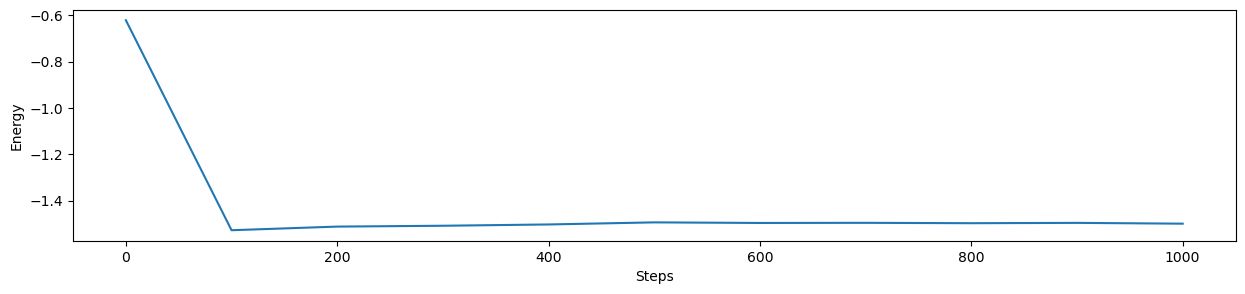

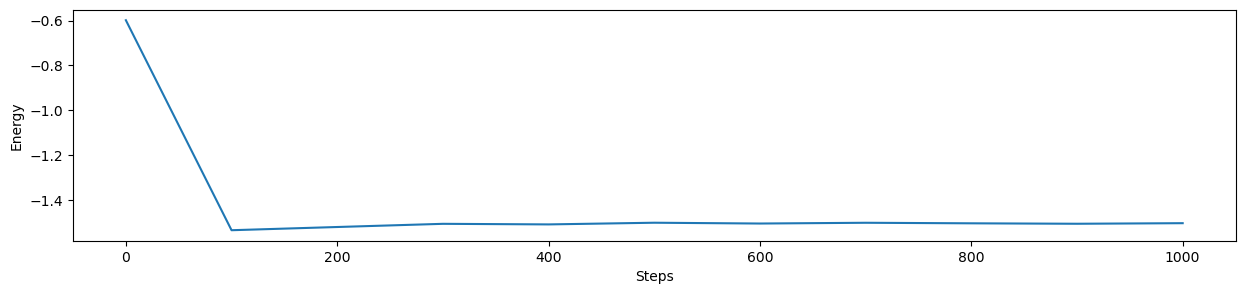

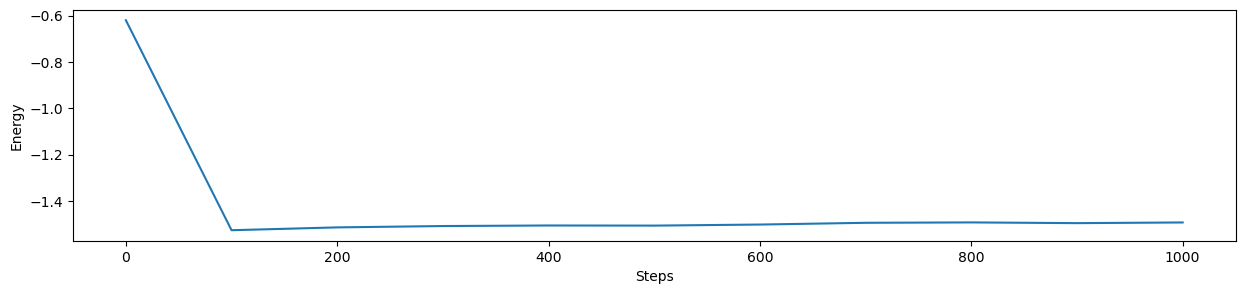

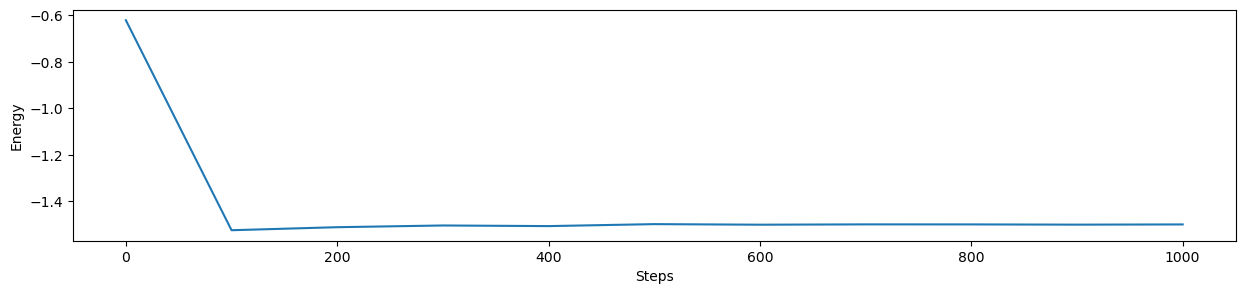

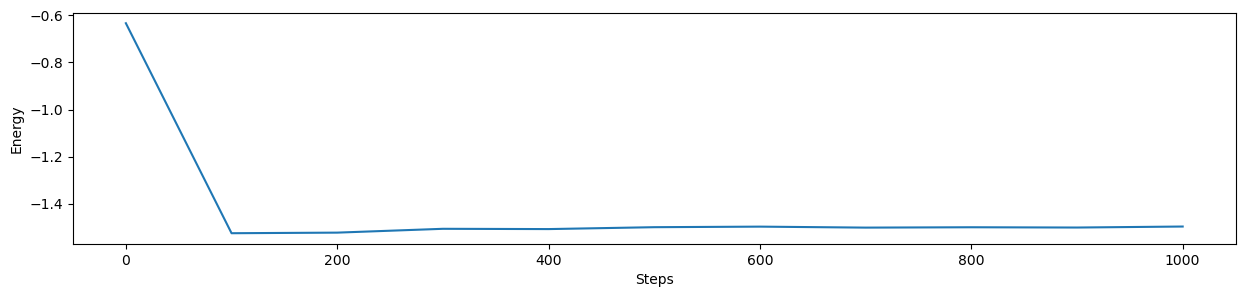

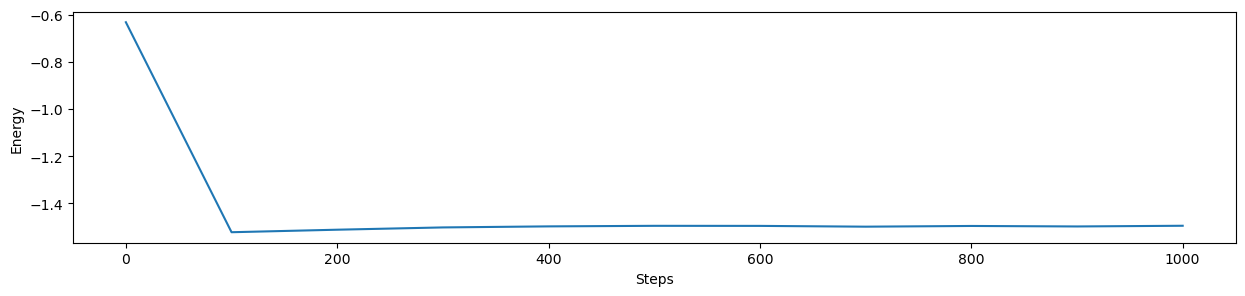

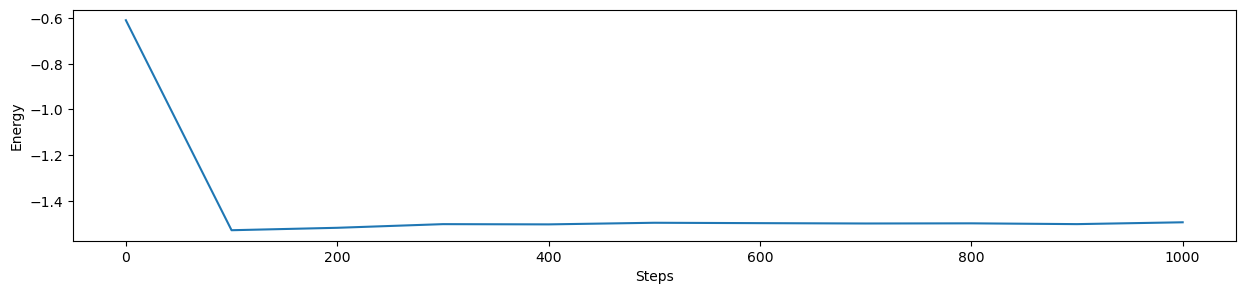

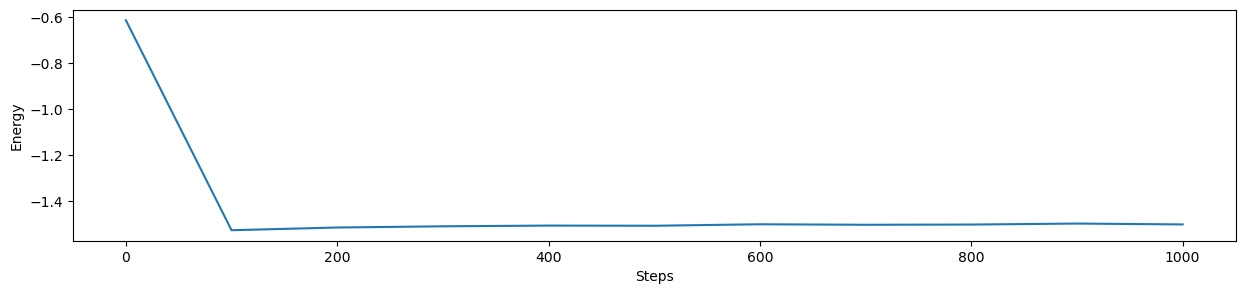

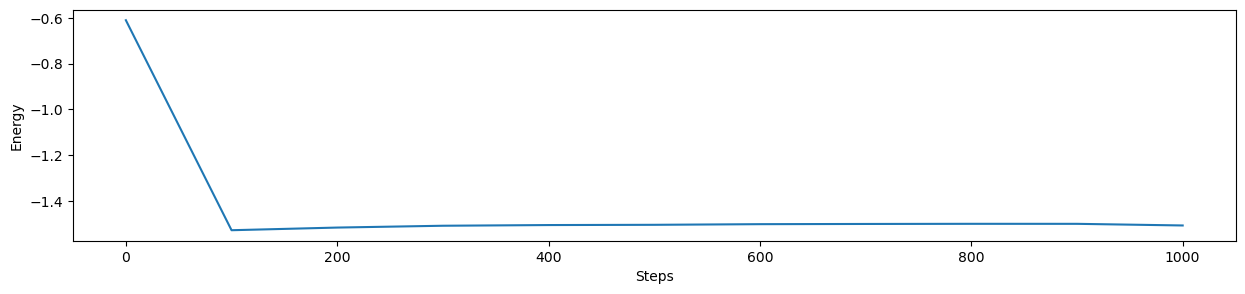

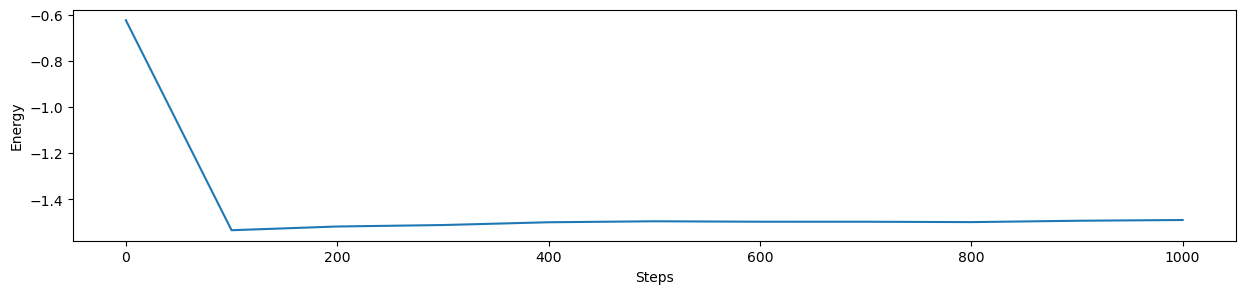

In [42]:
# Plot energy for all relaxation simulations
for sim in sim_list_rel:
    sim.analysis.plot_energy()

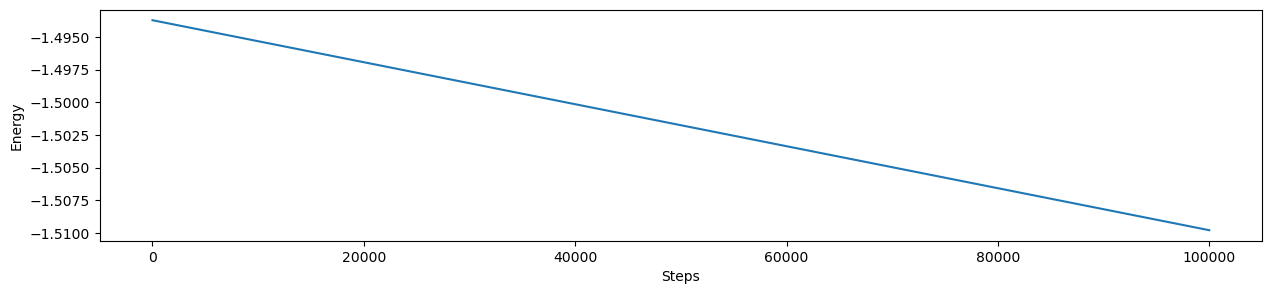

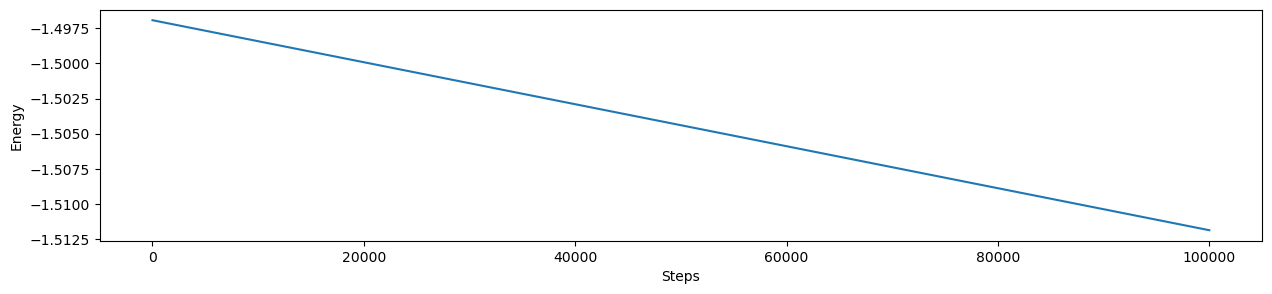

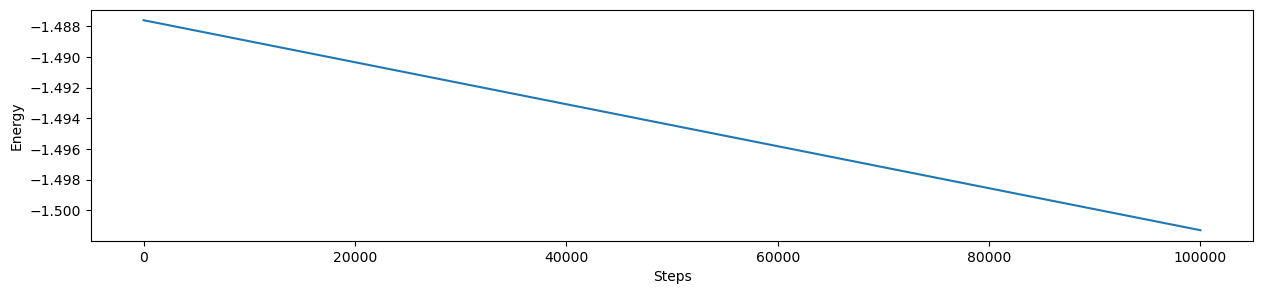

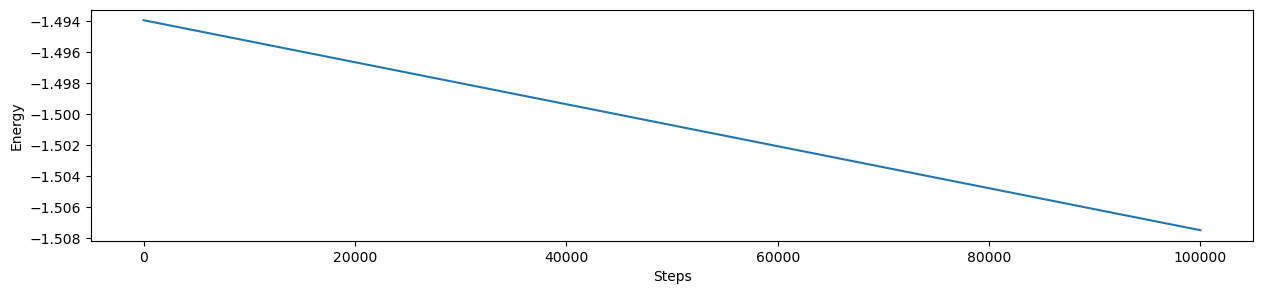

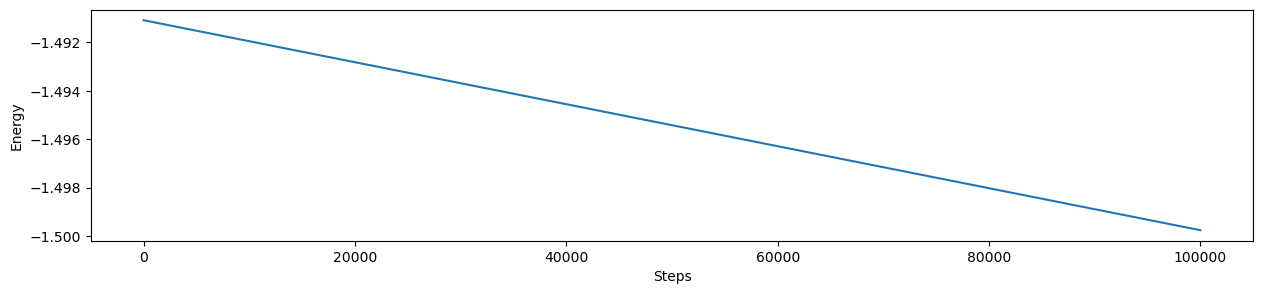

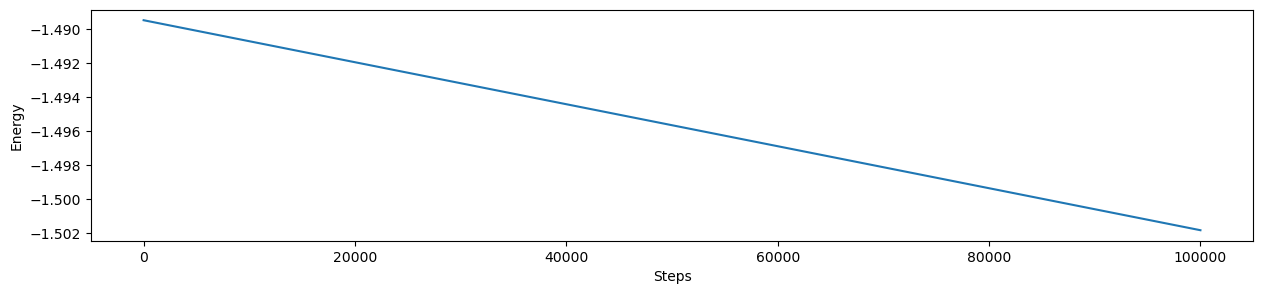

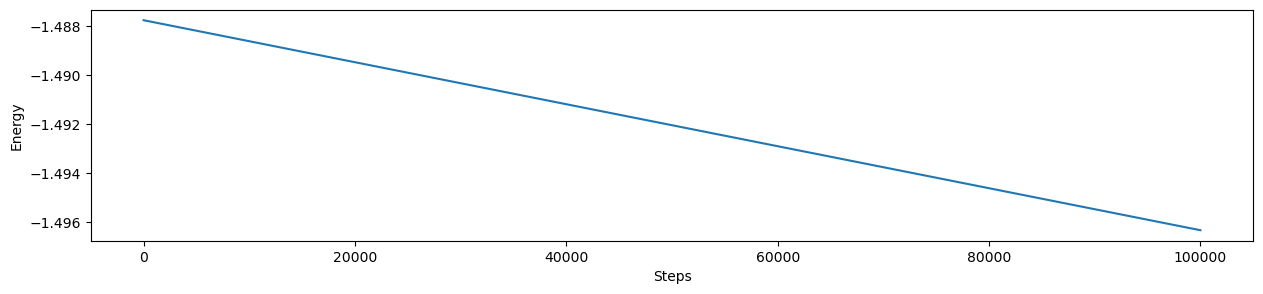

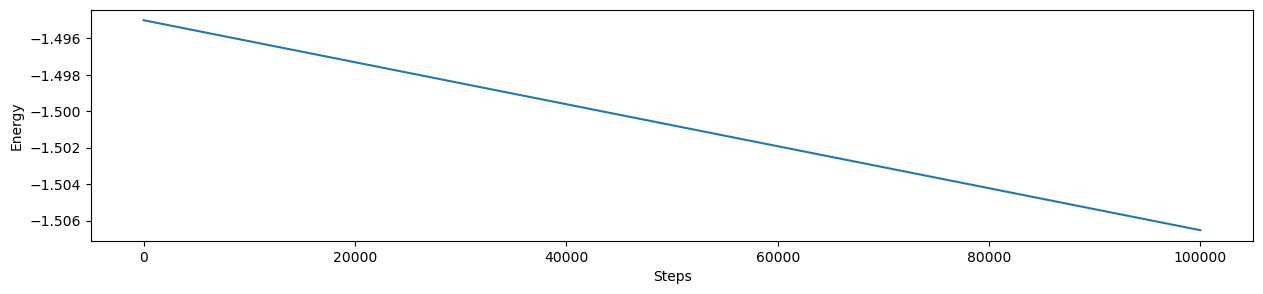

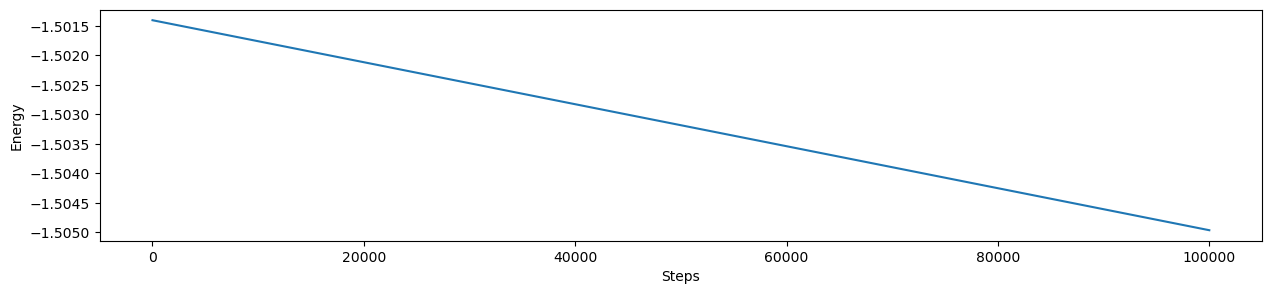

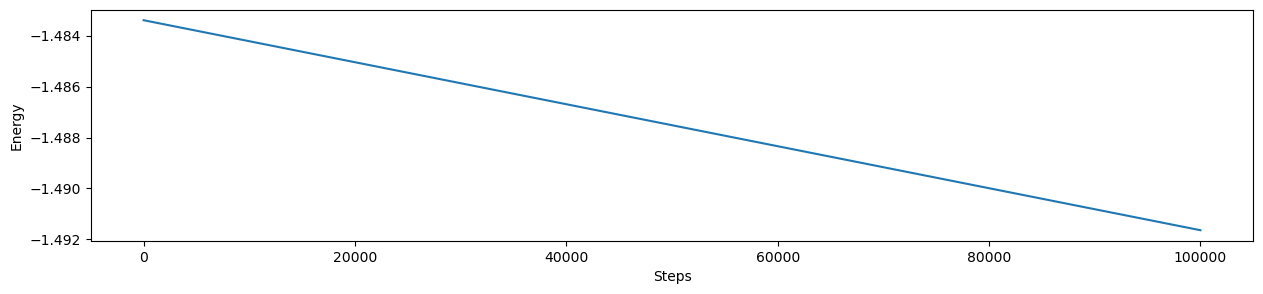

In [43]:
# Plot energy for all equilibration simulations
for sim in sim_list_eq:
    sim.analysis.plot_energy()

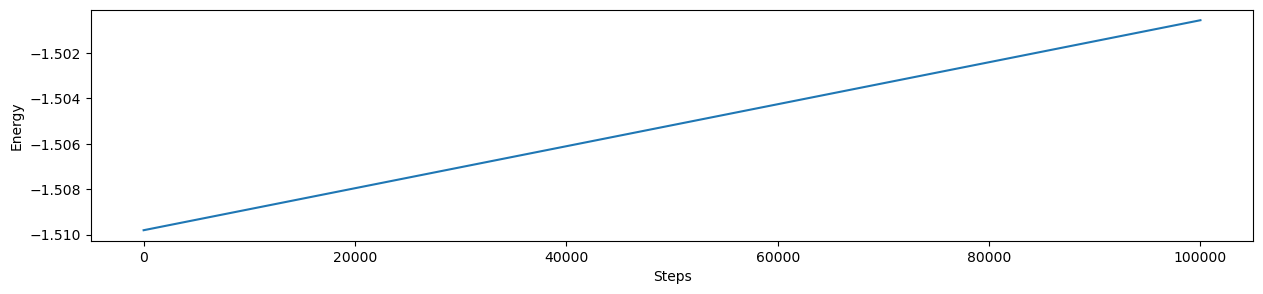

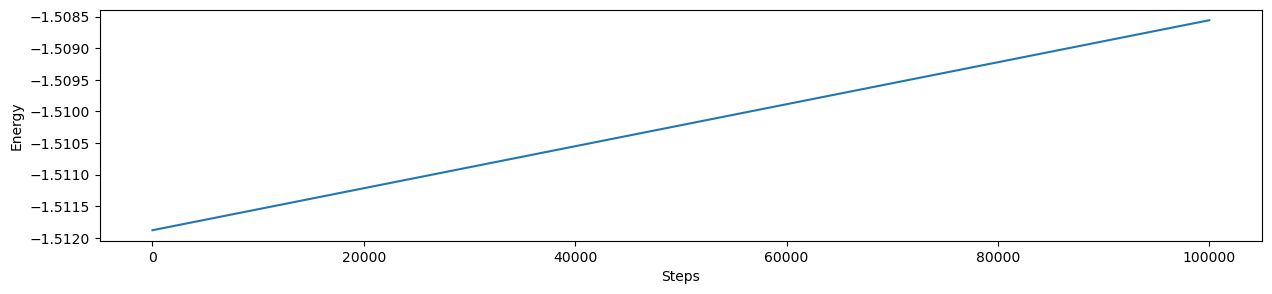

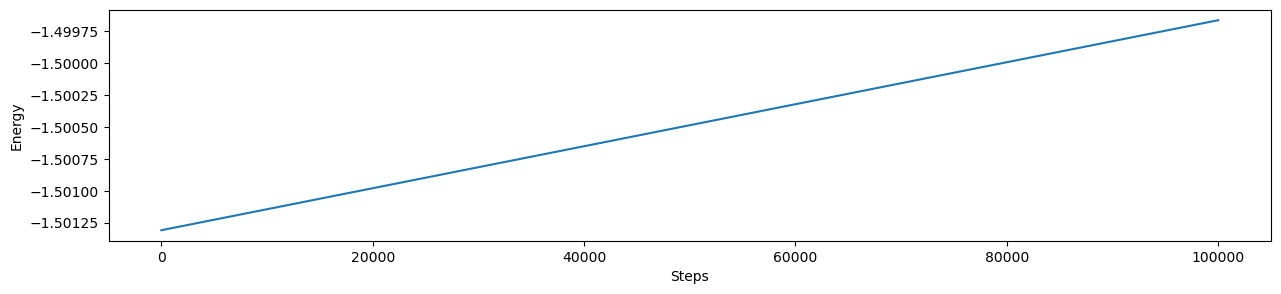

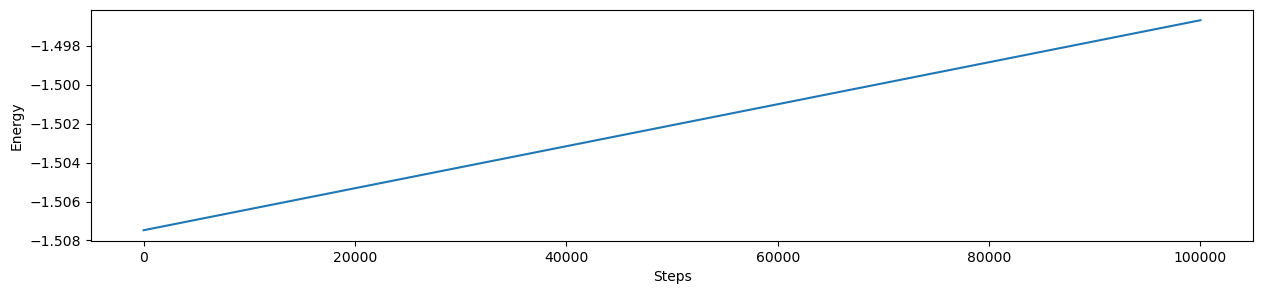

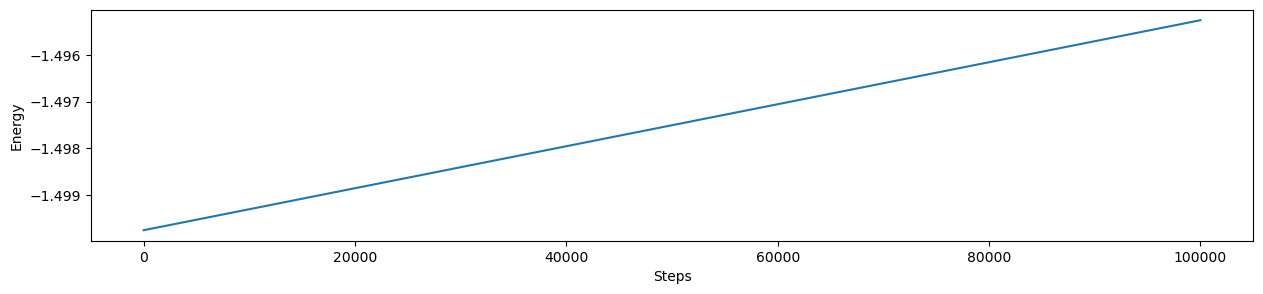

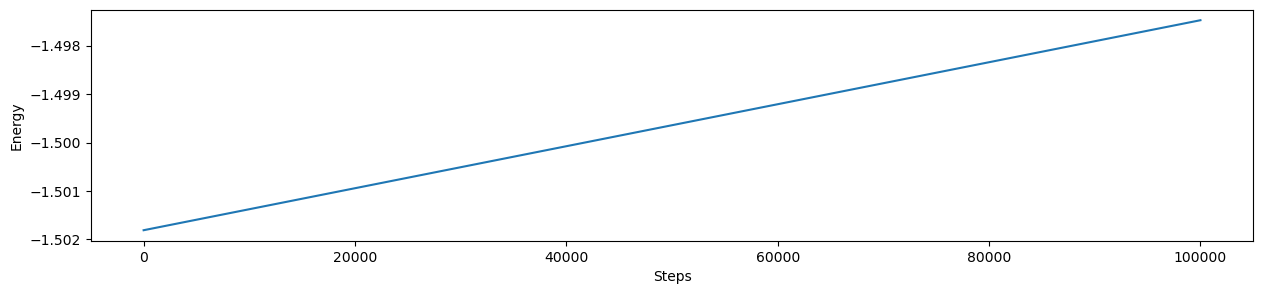

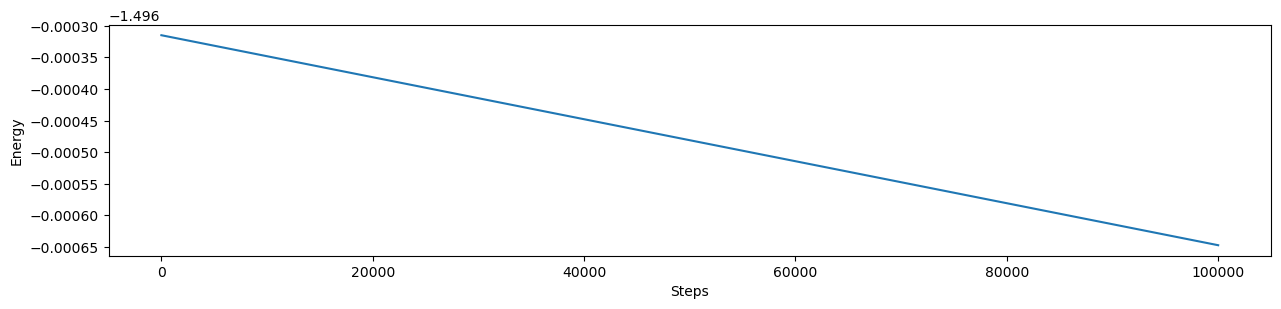

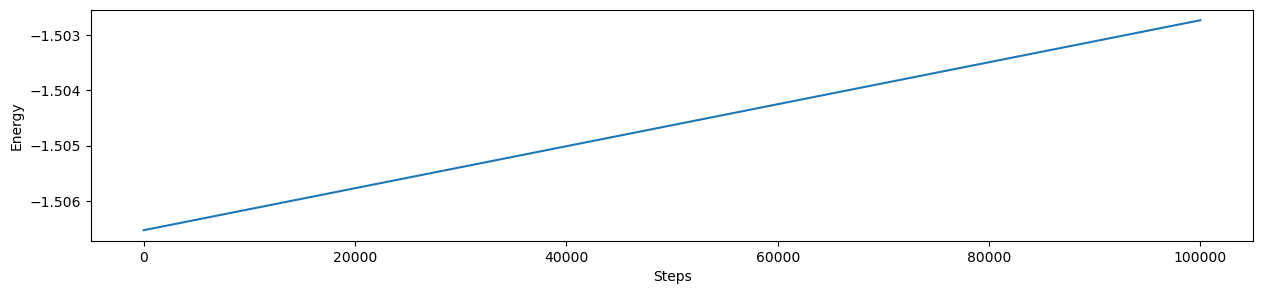

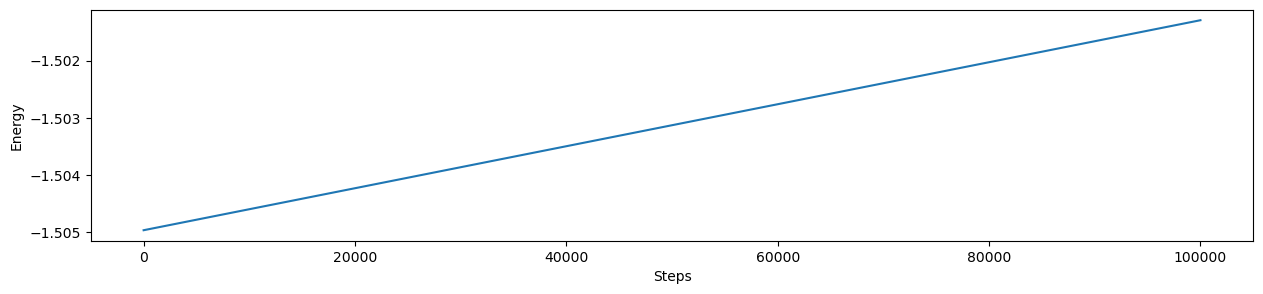

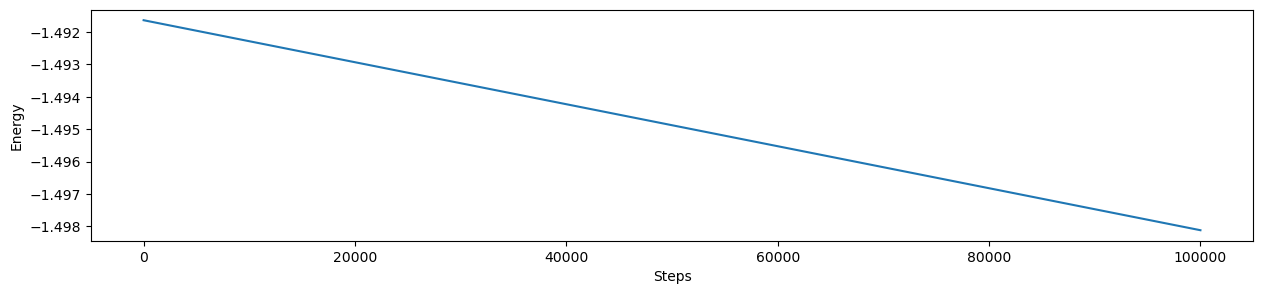

In [44]:
# Plot energy for all prod simulations
for sim in sim_list_prod:
    sim.analysis.plot_energy()